# Project Description

Dataset: https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring?select=fifa21_raw_data.csv%E2%80%8B

This is a messy and raw dataset of EA Sports' popular game, FIFA 21. (I love this game!) Datasets scraped from the web, as in this case, are usually messy. I am interested in cleaning and transforming this dataset to make it more accessible and useful for future projects.

After cleaning the dataset, I will perform some exploratory data analysis and explore some practical questions.

# Preliminary Data Cleaning

In [1]:
import pandas as pd
df=pd.read_csv('fifa21 raw data v2.csv')

/var/folders/hj/m__xh2951zvcgkjn37nwnbnr0000gn/T/ipykernel_88958/1605274602.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fifa21 raw data v2.csv')


In [2]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


There are a lot of columns in this dataset. After doing a preliminary analysis at the original csv file, I have identified a couple of areas to clean up in the dataset.

## Remove New Line Characters

In [4]:
df['Club']

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
18974             \n\n\n\nWuhan Zall
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
18977       \n\n\n\nDalian YiFang FC
18978       \n\n\n\nDalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [5]:
df['Club'] = df['Club'].str.strip('\n')
df['Club']

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

## Change the height and weight columns into appropriate data types

### Weight

In [6]:
# Currently, heights are in both cm and ft/inches. I want to standardize this into cm.
df['Height'].value_counts()

180cm    1474
178cm    1250
185cm    1182
183cm    1148
175cm    1091
         ... 
6'5"        1
157cm       1
5'4"        1
5'6"        1
155cm       1
Name: Height, Length: 62, dtype: int64

In [7]:
# function to convert ft/in into cm values and return only the numbers
import re
def convert_to_cm(height):
    # Check if the height is in centimeters
    if 'cm' in height:
        return int(re.search(r'\d+', height).group())
    else:
        # Convert feet and inches to centimeters
        feet, inches = map(int, re.findall(r'\d+', height))
        return int(round((feet * 30.48 + inches * 2.54),0))

In [8]:
# dtype is now int. good.
df['Height'] = df['Height'].apply(convert_to_cm)
df['Height']

0        170
1        187
2        188
3        181
4        175
        ... 
18974    178
18975    175
18976    179
18977    175
18978    188
Name: Height, Length: 18979, dtype: int64

In [9]:
# make sure that all values are correct
df['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155])

### Weight

In [10]:
# Weight column is inconsistent. Let's standardize into kgs and keep only the number
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [11]:
def convert_to_kg(weight):
    # Check if the height is in centimeters
    if 'kg' in weight:
        return int(re.search(r'\d+', weight).group())
    else:
        # Convert feet and inches to centimeters
        return int(round(int(re.search(r'\d+', weight).group())/2.204))

In [12]:
df['Weight'] = df['Weight'].apply(convert_to_kg)

In [13]:
# now all weights are in kgs, and all are integers
df['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

## 'Joined' column
split into joined month, day, and year

In [14]:
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [15]:
df['Joined_Year'] = pd.DatetimeIndex(df['Joined']).year
df['Joined_Month'] = pd.DatetimeIndex(df['Joined']).month
df['Joined_Day'] = pd.DatetimeIndex(df['Joined']).day

In [16]:
df[['Joined','Joined_Year','Joined_Month','Joined_Day']]

,Joined,Joined_Year,Joined_Month,Joined_Day
0,"Jul 1, 2004",2004,7,1
1,"Jul 10, 2018",2018,7,10
2,"Jul 16, 2014",2014,7,16
3,"Aug 30, 2015",2015,8,30
4,"Aug 3, 2017",2017,8,3
...,...,...,...,...
18974,"Jul 13, 2018",2018,7,13
18975,"Aug 1, 2020",2020,8,1
18976,"Mar 8, 2019",2019,3,8
18977,"Sep 22, 2020",2020,9,22


## Value Column
convert Value, Wage, Release Clause columns from string to integer

In [17]:
# these are currently string objects. Want to change these to only integers.
df.loc[:,['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M
...,...,...,...
18974,€100K,€1K,€70K
18975,€130K,€500,€165K
18976,€120K,€500,€131K
18977,€100K,€2K,€88K


In [18]:
# get rid of euro sign
df['Value'] = df['Value'].str.lstrip('€')
df['Wage'] = df['Wage'].str.lstrip('€')
df['Release Clause'] = df['Release Clause'].str.lstrip('€')
df.loc[:,['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,103.5M,560K,138.4M
1,63M,220K,75.9M
2,120M,125K,159.4M
3,129M,370K,161M
4,132M,270K,166.5M
...,...,...,...
18974,100K,1K,70K
18975,130K,500,165K
18976,120K,500,131K
18977,100K,2K,88K


In [19]:
# multiply values by one thousand or million accordingly
def multiply(value):
    if 'M' in value:
        return float(value[:-1])*1000000
    elif 'K' in value:
        return float(value[:-1])*1000
    else:
        return float(value)
        

In [20]:
# updated version. contains all float values
df['Value'] = df['Value'].apply(multiply)
df['Wage'] = df['Wage'].apply(multiply)
df['Release Clause'] = df['Release Clause'].apply(multiply)
df.loc[:,['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,103500000.0,560000.0,138400000.0
1,63000000.0,220000.0,75900000.0
2,120000000.0,125000.0,159400000.0
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166500000.0
...,...,...,...
18974,100000.0,1000.0,70000.0
18975,130000.0,500.0,165000.0
18976,120000.0,500.0,131000.0
18977,100000.0,2000.0,88000.0


## IR column (player star rating) has "star" symbol

Strip column of stars and make numerical

In [29]:
df['IR']

0        5 ★
1        5 ★
2        3 ★
3        4 ★
4        5 ★
        ... 
18974    1 ★
18975    1 ★
18976    1 ★
18977    1 ★
18978    1 ★
Name: IR, Length: 18979, dtype: object

In [30]:
df['IR'] = df['IR'].str.replace(' ★', '').astype(int)
df['IR']

0        5
1        5
2        3
3        4
4        5
        ..
18974    1
18975    1
18976    1
18977    1
18978    1
Name: IR, Length: 18979, dtype: int64

# Exploratory Data Analysis
After cleaning up the data a bit, I want to take a deeper look into the dataset.

There are ENDLESS ways to perform EDA. In the following I merely give a few examples of some of the insights that can be explored and visualized. In a real business setting, the direction of analysis depends on business demands.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   Name              18979 non-null  object 
 2   LongName          18979 non-null  object 
 3   photoUrl          18979 non-null  object 
 4   playerUrl         18979 non-null  object 
 5   Nationality       18979 non-null  object 
 6   Age               18979 non-null  int64  
 7   ↓OVA              18979 non-null  int64  
 8   POT               18979 non-null  int64  
 9   Club              18979 non-null  object 
 10  Contract          18979 non-null  object 
 11  Positions         18979 non-null  object 
 12  Height            18979 non-null  int64  
 13  Weight            18979 non-null  int64  
 14  Preferred Foot    18979 non-null  object 
 15  BOV               18979 non-null  int64  
 16  Best Position     18979 non-null  object

Based on a very high level look at the column infos, it appears that there are a lot of int columns representing in-game stats of each player, such as attacking, crossing, finishing, etc. Details of these attributes can be found here: https://fifauteam.com/fifa-21-attributes-guide/ Other columns include relevant information on the player, such as weight, height, nationality, salary, preferred foot, which club they play for, when they joined, etc.

In [22]:
# Let's see if there are null values in any of the columns
for column in df.columns:
    if df[column].isnull().sum()>0:
        print(f'{column} has {df[column].isnull().sum()} null values')

Loan Date End has 17966 null values
Hits has 2595 null values


In [23]:
# Proceed to drop Loan Date End Column as it has a high percentage of nulls and likely won't benefit analysis
df=df.drop(['Loan Date End'], axis=1)

In [24]:
# A quick look at summary statistics
df.describe()

,ID,Age,↓OVA,POT,Height,Weight,BOV,Value,Wage,Release Clause,...,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Joined_Year,Joined_Month,Joined_Day
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,1.897900e+04,18979.000000,1.897900e+04,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,181.200221,75.019021,66.751726,2.865063e+06,9092.062279,3.962951e+06,...,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,2018.288371,5.659466,10.191053
std,27141.054157,4.710520,6.968999,6.114635,6.840054,7.073542,6.747193,7.685154e+06,19707.021089,9.772762e+06,...,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883,2.085924,3.094688,9.979612
min,41.000000,16.000000,47.000000,47.000000,155.000000,50.000000,48.000000,0.000000e+00,0.000000,0.000000e+00,...,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,1998.000000,1.000000,1.000000
25%,210135.000000,21.000000,61.000000,67.000000,176.000000,70.000000,62.000000,4.750000e+05,1000.000000,4.235000e+05,...,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000,2018.000000,2.000000,1.000000
50%,232418.000000,25.000000,66.000000,71.000000,181.000000,75.000000,67.000000,9.500000e+05,3000.000000,1.000000e+06,...,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000,2019.000000,7.000000,7.000000
75%,246922.500000,29.000000,70.000000,75.000000,186.000000,80.000000,71.000000,2.000000e+06,8000.000000,2.800000e+06,...,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000,2020.000000,8.000000,18.000000
max,259216.000000,53.000000,93.000000,95.000000,206.000000,110.000000,93.000000,1.855000e+08,560000.000000,2.031000e+08,...,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000,2020.000000,12.000000,31.000000


Given the many columns, here are a few questions that I would like to analyzye and visualize
1. distribution of key player attributes, such as attacking, defending, and movement
2. distribution of players based on nationality and clubs
3. Which players are highly valuable but relatively underpaid (on low wages)?

## Distribution of player attributes

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Histogrm of Attacking')

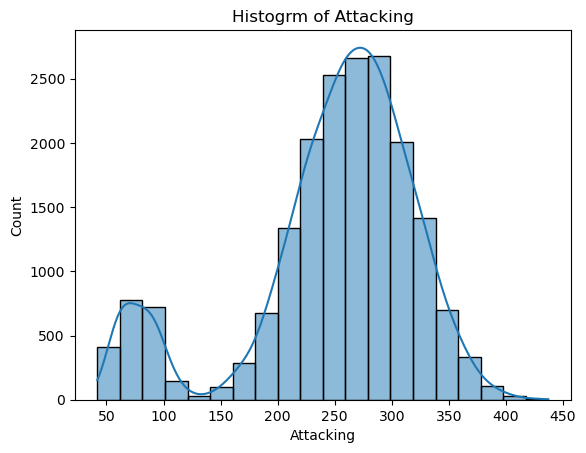

In [26]:
sns.histplot(df['Attacking'], bins=20, kde=True)
plt.title('Histogrm of Attacking')

Observation: bimodal.
possible explanation: two distinct types of players. eg. attackers and defenders. if so, would expect similar shape for defensive attribute

Text(0.5, 1.0, 'Histogrm of Defending')

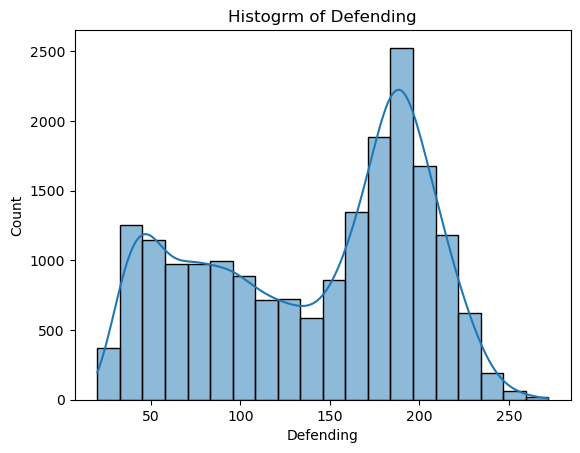

In [27]:
sns.histplot(df['Defending'], bins=20, kde=True)
plt.title('Histogrm of Defending')

Text(0.5, 1.0, 'Histogrm of Goalkeeping')

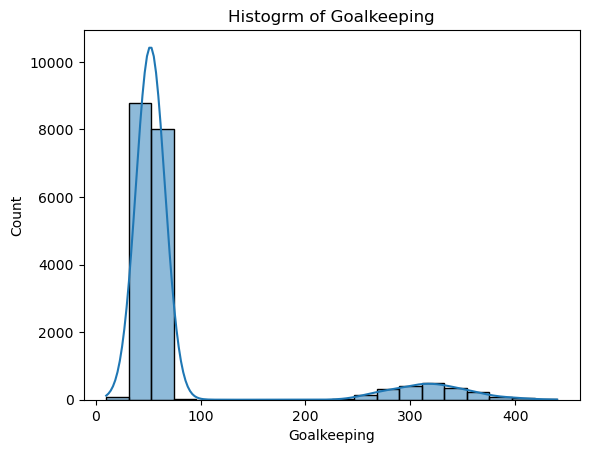

In [28]:
sns.histplot(df['Goalkeeping'], bins=20, kde=True)
plt.title('Histogrm of Goalkeeping')

## Distribution of Players Based on Nationality and Club

In [39]:
nationality_counts = df['Nationality'].value_counts().head(20)
club_counts = df['Club'].value_counts().head(10)

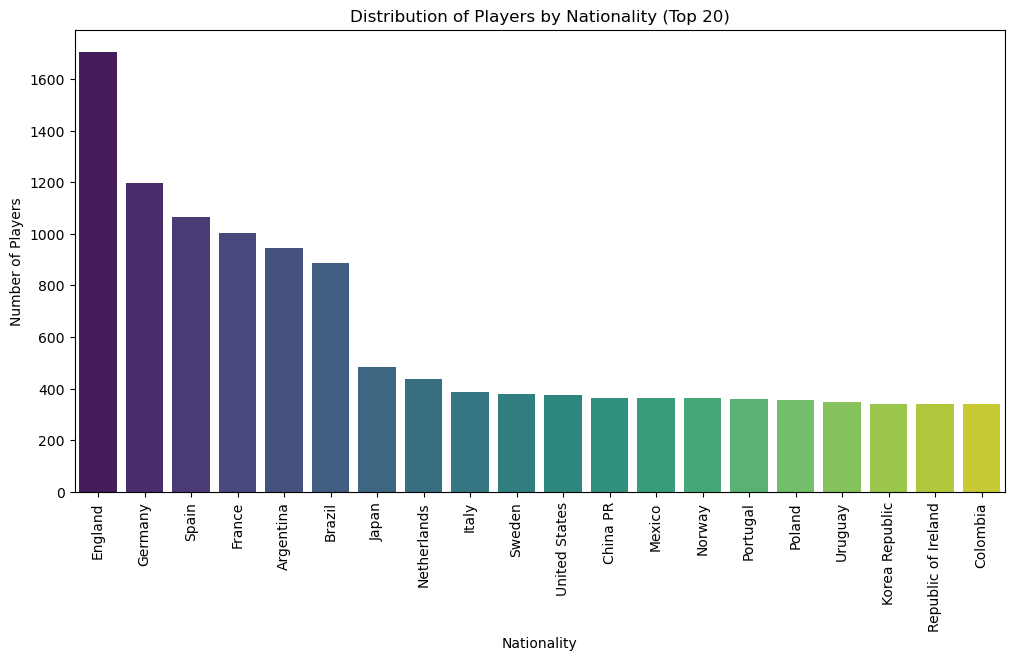

In [37]:
# Plotting the distribution of players based on nationality
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')
plt.title('Distribution of Players by Nationality (Top 20)')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

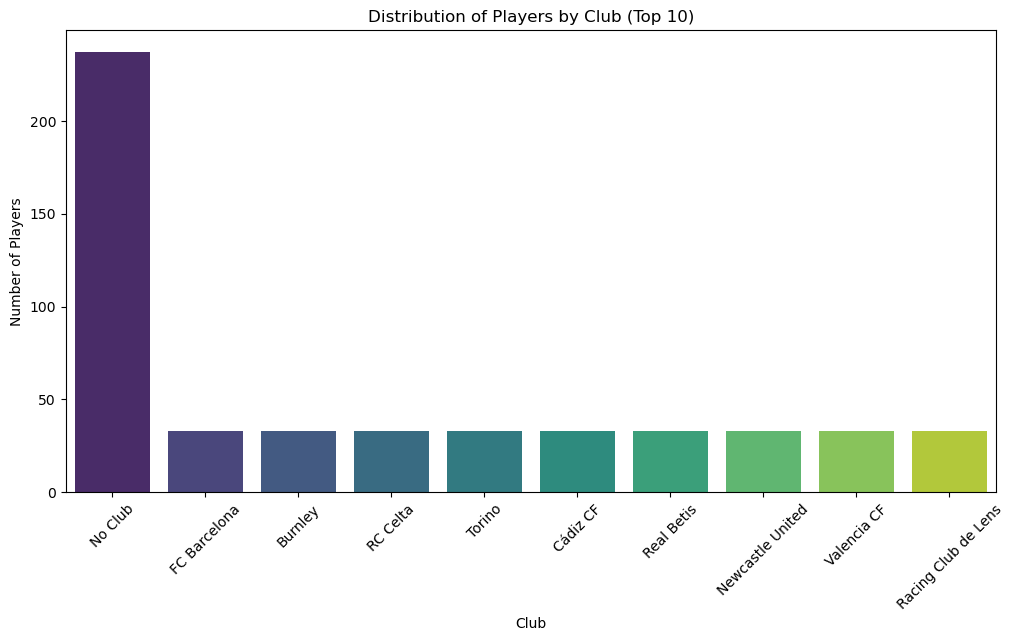

In [40]:
top_clubs = club_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_clubs.index, y=top_clubs.values, palette='viridis')
plt.title('Distribution of Players by Club (Top 10)')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

## Valuable Players That Are Underpaid

To answer this question, I look at the scatterplot between value and wage.

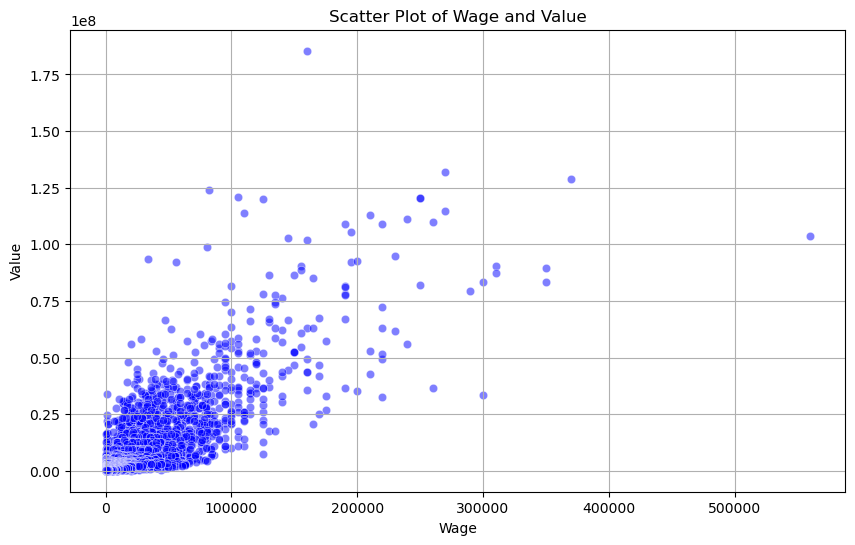

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Wage'], y=df['Value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Wage and Value')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [62]:
# Identify players in the top-right corner (high value, low wage)
# These cutoff points for wage and value are arbitrary. Could be changed
underpaid_players = df[(df['Wage'] < 300000) & (df['Value'] > 1*10**7)]
# From 18979 total players, there are 1089 players who would be considered "high value, low wage" based on cutoffs
underpaid_players['Name']

1       Cristiano Ronaldo
2                J. Oblak
4               Neymar Jr
5          R. Lewandowski
6                M. Salah
              ...        
1994           S. Córdova
2005           G. Arteaga
2012            M. Camara
2018          A. Ramsdale
2032           M. Djenepo
Name: Name, Length: 1089, dtype: object